In [2]:
# Import necessary libraries
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
# Load the FMCG business data from a CSV file
fmcg_df = pd.read_csv('dataset/FMCG_business_data_2022_2024.csv')

In [4]:
# Display the first few rows of the dataframe
fmcg_df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [5]:
# Display the summary information of the dataframe
fmcg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


#### Data Quality and Overview

##### Cleaning and Preprocessing

In [6]:
# Check for duplicated rows
duplicate_rows = fmcg_df.duplicated().sum()
print(duplicate_rows)

0


In [7]:
# Convert the 'date' column to datetime format
fmcg_df['date'] = pd.to_datetime(fmcg_df['date'])

In [8]:
# Check the uniqueness of the non-numerical values for the quality
print(fmcg_df['brand'].unique())
print('----------------------------')
print(fmcg_df['segment'].unique())
print('----------------------------')
print(fmcg_df['category'].unique())
print('----------------------------')
print(fmcg_df['channel'].unique())
print('----------------------------')
print(fmcg_df['region'].unique())

['MiBrand1' 'MiBrand4' 'YoBrand4' 'YoBrand2' 'YoBrand1' 'YoBrand3'
 'ReBrand1' 'ReBrand4' 'MiBrand3' 'JuBrand3' 'SnBrand2' 'ReBrand2'
 'SnBrand3' 'MiBrand2']
----------------------------
['Milk-Seg3' 'Milk-Seg2' 'Yogurt-Seg2' 'Yogurt-Seg1' 'Yogurt-Seg3'
 'ReadyMeal-Seg2' 'ReadyMeal-Seg1' 'Juice-Seg3' 'SnackBar-Seg3'
 'ReadyMeal-Seg3' 'SnackBar-Seg2' 'SnackBar-Seg1' 'Milk-Seg1']
----------------------------
['Milk' 'Yogurt' 'ReadyMeal' 'Juice' 'SnackBar']
----------------------------
['Retail' 'Discount' 'E-commerce']
----------------------------
['PL-Central' 'PL-North' 'PL-South']


In [9]:
# Check for illogical values in numerical columns
numerical_cols = ['price_unit', 'promotion_flag', 'delivery_days', 'stock_available', 'delivered_qty', 'units_sold']

for col in numerical_cols:
    illogical_values = fmcg_df[fmcg_df[col] < 0]
    if not illogical_values.empty:
        print(f"Illogical values found in {col}:")
        print(illogical_values)
        print()


Illogical values found in stock_available:
             date     sku     brand         segment   category   channel  \
70489  2023-07-26  SN-028  SnBrand2   SnackBar-Seg1   SnackBar  Discount   
83501  2023-09-21  SN-010  SnBrand2   SnackBar-Seg2   SnackBar    Retail   
123633 2024-03-14  RE-007  ReBrand4  ReadyMeal-Seg1  ReadyMeal  Discount   

            region pack_type  price_unit  promotion_flag  delivery_days  \
70489     PL-South    Single        2.91               0              5   
83501   PL-Central    Carton        8.60               1              4   
123633  PL-Central    Carton        2.38               0              4   

        stock_available  delivered_qty  units_sold  
70489                -2             -3          -3  
83501               -12            -11         -25  
123633               -6             -7          -8  

Illogical values found in delivered_qty:
             date     sku     brand         segment   category   channel  \
70489  2023-07-26  SN

In [10]:
# Remove rows with illogical negative values in numerical columns
fmcg_df = fmcg_df[(fmcg_df[numerical_cols] >= 0).all(axis=1)]

##### Feature Engineering

In [11]:
# Add a new column for revenue

fmcg_df['revenue'] = (fmcg_df['price_unit'] * fmcg_df['units_sold']).round(2)

# Add a new column for stock left after sales
fmcg_df['stock_left'] = (fmcg_df['stock_available'] - fmcg_df['units_sold']).round(2)

# Flag stockouts where stock left is less than or equal to zero
fmcg_df['stockout_flag'] = (fmcg_df['stock_left'] <= 0).astype(int)

In [12]:
fmcg_df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,revenue,stock_left,stockout_flag
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,132,0
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.00,0,1
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,110,0
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,74,0
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,136,0


##### Descriptive Statistics and Distributions

In [13]:
# Get basic descriptive statistics for important columns
stats = fmcg_df[['price_unit', 'revenue','units_sold', 'delivery_days']].describe()
print(stats)

          price_unit        revenue     units_sold  delivery_days
count  190754.000000  190754.000000  190754.000000  190754.000000
mean        5.251989     104.593054      19.920211       3.004839
std         2.166692      79.522394      11.769429       1.414626
min         1.500000       0.000000       0.000000       1.000000
25%         3.380000      50.500000      12.000000       2.000000
50%         5.250000      85.440000      18.000000       3.000000
75%         7.130000     136.160000      25.000000       4.000000
max         9.000000    1145.600000     139.000000       5.000000


In [14]:
# Check distribution counts for 'delivery_days'
delivery_days_counts = fmcg_df['delivery_days'].value_counts().sort_index()
print(delivery_days_counts)

delivery_days
1    38129
2    37813
3    38023
4    38584
5    38205
Name: count, dtype: int64


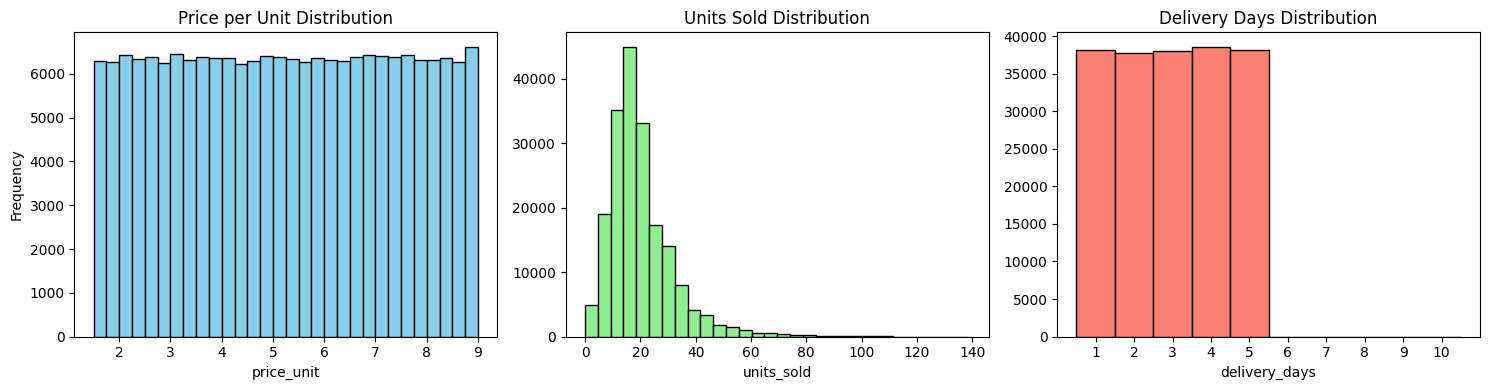

In [15]:
# Plot histograms for continuous numeric variables
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(fmcg_df['price_unit'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price per Unit Distribution')
plt.xlabel('price_unit')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(fmcg_df['units_sold'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Units Sold Distribution')
plt.xlabel('units_sold')

plt.subplot(1, 3, 3)
plt.hist(fmcg_df['delivery_days'], bins=range(1,12), color='salmon', edgecolor='black', align='left')
plt.title('Delivery Days Distribution')
plt.xlabel('delivery_days')
plt.xticks(range(1,11))

plt.tight_layout()
plt.show()

###### The business insight from these histograms is: Pricing distribution is even across all available price points, indicating no specific price band dominates sales and that customers are willing to purchase SKUs at any price within the range. The most frequent sales transactions involve 15 to 20 units per SKU, suggesting this is the preferred purchase size among customers. Additionally, product deliveries are handled efficiently, with almost all products delivered within one to five days and the peak at four days, reflecting effective logistics operations.

### A. Sales and Demand Analysis

##### 1. Sales Trends Over Time

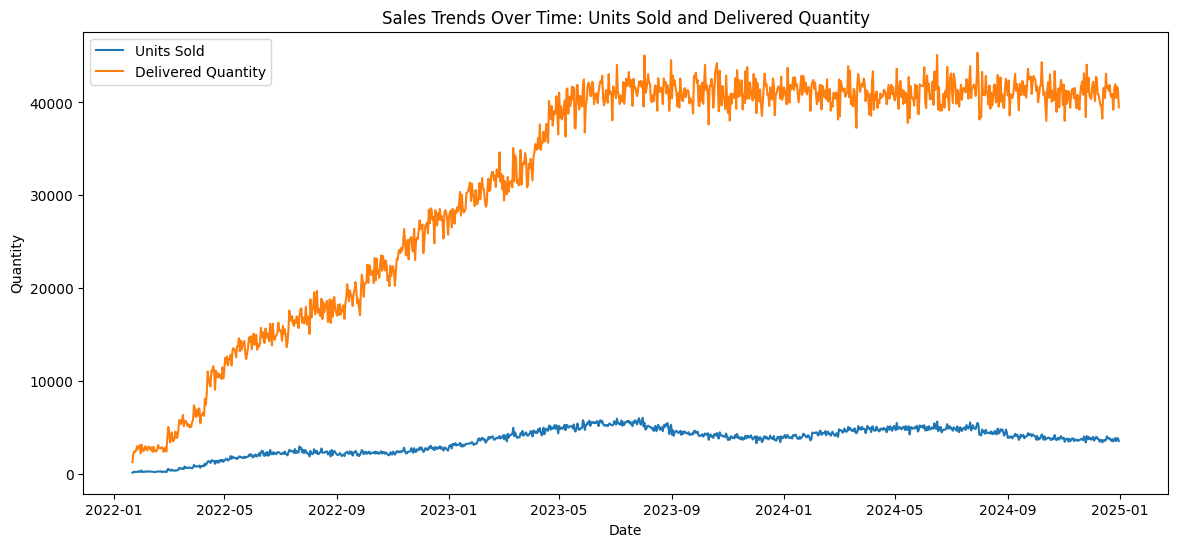

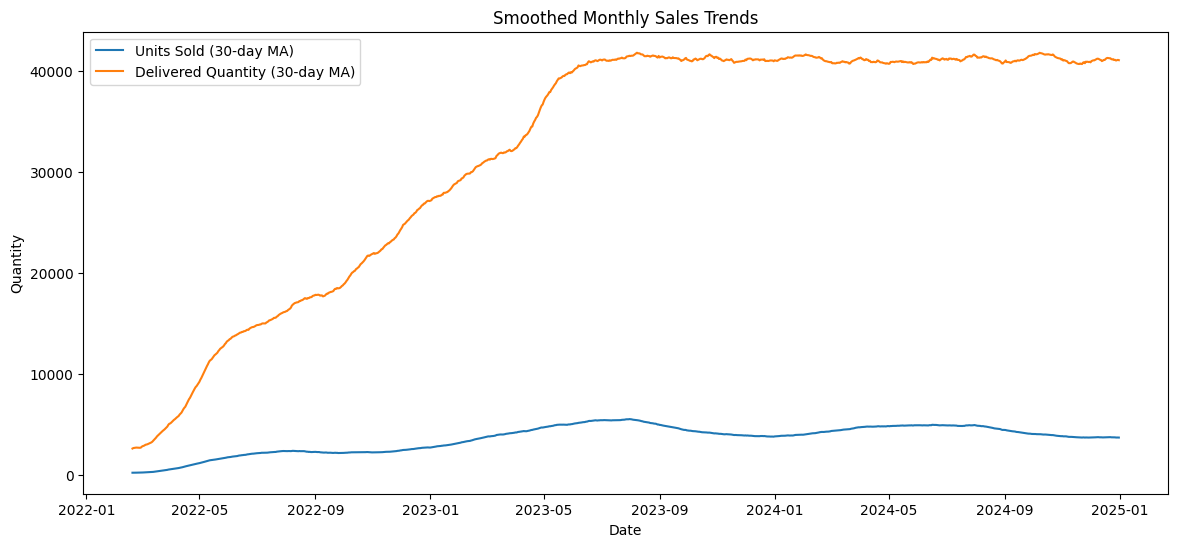

Peak units sold date: 2023-07-31 00:00:00
Trough units sold date: 2022-01-21 00:00:00
Peak delivered quantity date: 2024-07-30 00:00:00
Trough delivered quantity date: 2022-01-21 00:00:00


In [16]:
# Aggregate data by date
daily_data = fmcg_df.groupby('date').agg({'units_sold': 'sum', 'delivered_qty': 'sum'}).reset_index()

# Plot time-series trends of units_sold and delivered_qty
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_data, x='date', y='units_sold', label='Units Sold')
sns.lineplot(data=daily_data, x='date', y='delivered_qty', label='Delivered Quantity')
plt.title('Sales Trends Over Time: Units Sold and Delivered Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Calculate 30-day moving average to smooth trends and highlight seasonal patterns
window_size = 30  # Approximate monthly smoothing
daily_data['units_sold_rolling'] = daily_data['units_sold'].rolling(window=window_size).mean()
daily_data['delivered_qty_rolling'] = daily_data['delivered_qty'].rolling(window=window_size).mean()

# Plot smoothed sales trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_data, x='date', y='units_sold_rolling', label='Units Sold (30-day MA)')
sns.lineplot(data=daily_data, x='date', y='delivered_qty_rolling', label='Delivered Quantity (30-day MA)')
plt.title('Smoothed Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Identify key dates for peaks and troughs
peak_units_sold_date = daily_data.loc[daily_data['units_sold'].idxmax(), 'date']
trough_units_sold_date = daily_data.loc[daily_data['units_sold'].idxmin(), 'date']
peak_delivered_qty_date = daily_data.loc[daily_data['delivered_qty'].idxmax(), 'date']
trough_delivered_qty_date = daily_data.loc[daily_data['delivered_qty'].idxmin(), 'date']

print(f"Peak units sold date: {peak_units_sold_date}")
print(f"Trough units sold date: {trough_units_sold_date}")
print(f"Peak delivered quantity date: {peak_delivered_qty_date}")
print(f"Trough delivered quantity date: {trough_delivered_qty_date}")

# Use these insights to drive business decisions on inventory, promotion timing, and demand forecasting


###### The business exhibits strong seasonal sales patterns, with both units sold and delivered quantities peaking in mid to late year and troughs at the very beginning of the period. Delivery volumes generally track sales demand, indicating responsive supply chain operations. The highest sales occurred around July 2023, while the lowest were at the start in January 2022; a similar pattern is seen in deliveries, peaking July 2024. These insights suggest aligning inventory and promotions to anticipated high-demand periods and carefully managing stock at the start of the year to reduce excess and costs

##### 2. SKU Performance

In [17]:
fmcg_df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,revenue,stock_left,stockout_flag
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,132,0
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.00,0,1
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,110,0
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,74,0
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,136,0


In [18]:
# Evaluate sales and units_sold by sku and brand

product_performance = fmcg_df.groupby(['sku', 'brand'])[['units_sold','revenue']].sum().reset_index()

# Top performing products by revenue
top_product_performers = product_performance.sort_values(by='revenue', ascending=False).head(5)

# Low performing products by revenue
low_product_performers = product_performance.sort_values(by='revenue', ascending=True).head(5)

# Top performing products by units sold
top_units_sold_performers = product_performance.sort_values(by='units_sold', ascending=False).head(5)

# Low performing products by units sold
low_units_sold_performers = product_performance.sort_values(by='units_sold', ascending=True).head(5)

print("Top 5 Products by Revenue:", top_product_performers)
print()
print("Low 5 Products by Revenue:", top_product_performers)
print()
print("Top 5 Products by Units Sold:", top_units_sold_performers)
print()
print("Low 5 Products by Units Sold:", low_units_sold_performers)
print()

Top 5 Products by Revenue:        sku     brand  units_sold    revenue
29  YO-029  YoBrand4      177798  931878.44
21  YO-005  YoBrand2      176095  913420.95
23  YO-012  YoBrand1      170575  899410.48
7   MI-026  MiBrand4      152324  796853.75
8   RE-004  ReBrand1      149559  792286.33

Low 5 Products by Revenue:        sku     brand  units_sold    revenue
29  YO-029  YoBrand4      177798  931878.44
21  YO-005  YoBrand2      176095  913420.95
23  YO-012  YoBrand1      170575  899410.48
7   MI-026  MiBrand4      152324  796853.75
8   RE-004  ReBrand1      149559  792286.33

Top 5 Products by Units Sold:        sku     brand  units_sold    revenue
29  YO-029  YoBrand4      177798  931878.44
21  YO-005  YoBrand2      176095  913420.95
23  YO-012  YoBrand1      170575  899410.48
7   MI-026  MiBrand4      152324  796853.75
8   RE-004  ReBrand1      149559  792286.33

Low 5 Products by Units Sold:        sku     brand  units_sold    revenue
3   MI-008  MiBrand3       82888  435195.91
4  

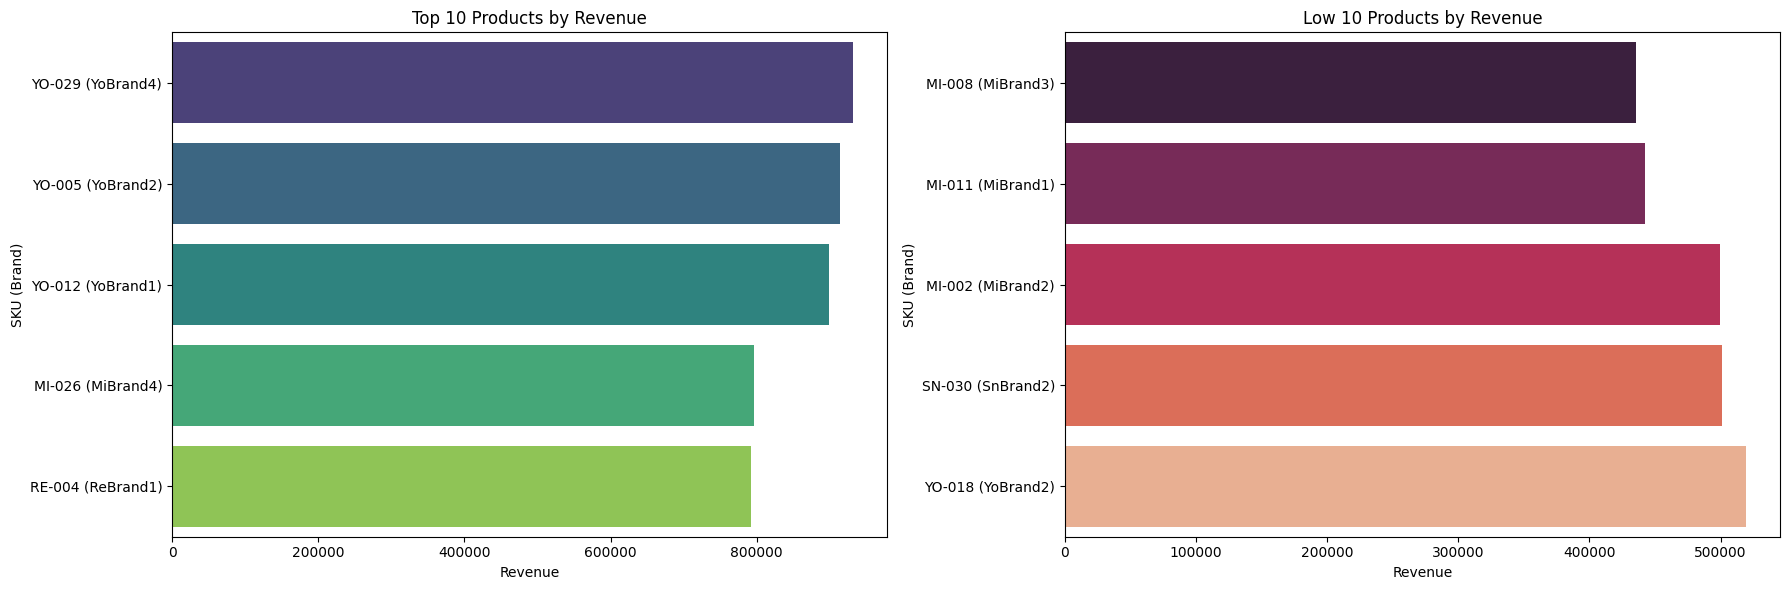

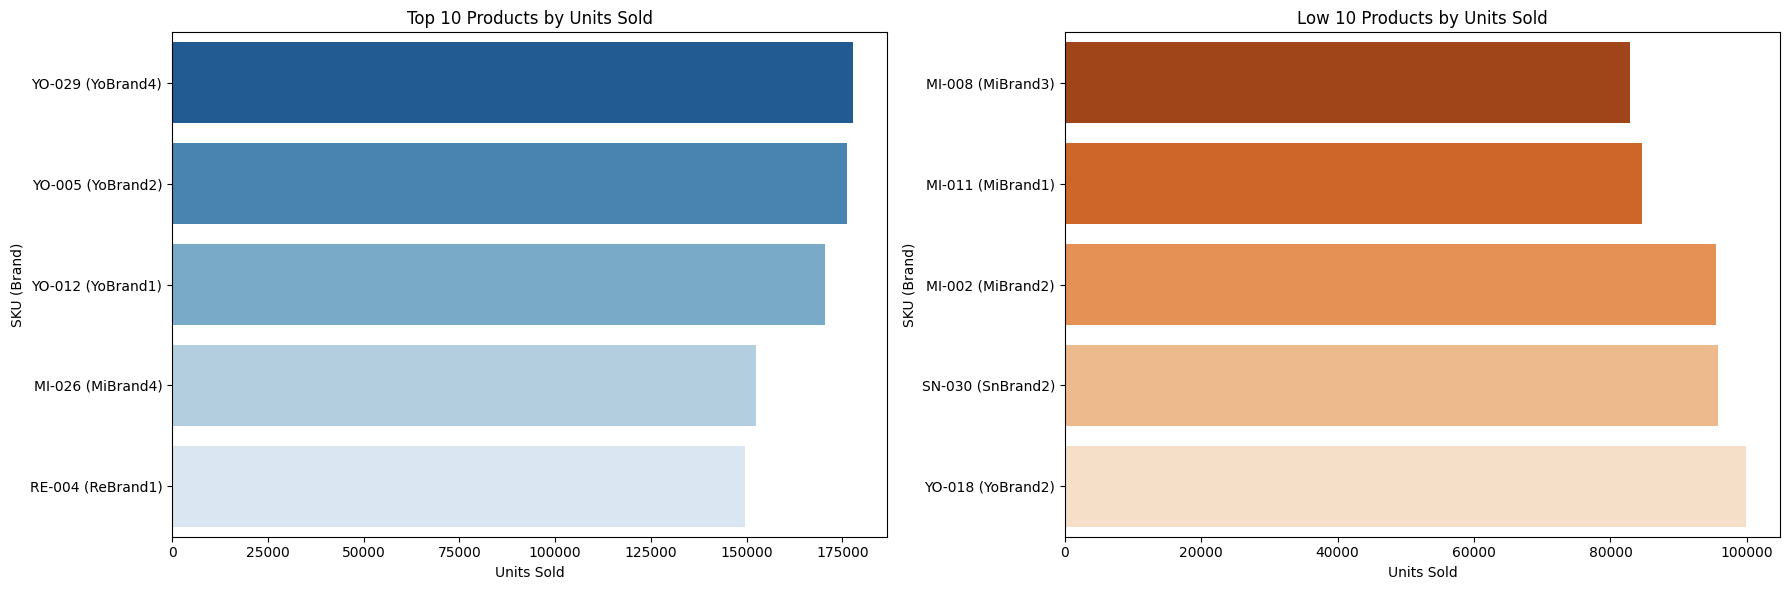

In [19]:
# SUBPLOTS: Top and low performers by revenue
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
top_sku_and_brand_rev = top_product_performers['sku'] + ' (' + top_product_performers['brand'] + ')'
sns.barplot(
    x='revenue',
    y=top_sku_and_brand_rev,
    data=top_product_performers,
    ax=axes[0],
    palette='viridis',
    hue=top_sku_and_brand_rev,
    legend=False
)
axes[0].set_title('Top 10 Products by Revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('SKU (Brand)')

low_sku_and_brand_rev = low_product_performers['sku'] + ' (' + low_product_performers['brand'] + ')'
sns.barplot(
    x='revenue',
    y=low_sku_and_brand_rev,
    data=low_product_performers,
    ax=axes[1],
    palette='rocket',
    hue=low_sku_and_brand_rev,
    legend=False
)
axes[1].set_title('Low 10 Products by Revenue')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('SKU (Brand)')

plt.tight_layout()
plt.show()

# SUBPLOTS: Top and low performers by units sold
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
top_sku_and_brand_units = top_units_sold_performers['sku'] + ' (' + top_units_sold_performers['brand'] + ')'
sns.barplot(
    x='units_sold',
    y=top_sku_and_brand_units,
    data=top_units_sold_performers,
    ax=axes[0],
    palette='Blues_r',
    hue=top_sku_and_brand_units,
    legend=False
)
axes[0].set_title('Top 10 Products by Units Sold')
axes[0].set_xlabel('Units Sold')
axes[0].set_ylabel('SKU (Brand)')

low_sku_and_brand_units = low_units_sold_performers['sku'] + ' (' + low_units_sold_performers['brand'] + ')'
sns.barplot(
    x='units_sold',
    y=low_sku_and_brand_units,
    data=low_units_sold_performers,
    ax=axes[1],
    palette='Oranges_r',
    hue=low_sku_and_brand_units,
    legend=False
)
axes[1].set_title('Low 10 Products by Units Sold')
axes[1].set_xlabel('Units Sold')
axes[1].set_ylabel('SKU (Brand)')

plt.tight_layout()
plt.show()

###### Analysis of SKU and brand sales performance indicates that the top five high-performing products are YO-029 (YoBrand4), YO-005 (YoBrand2), YO-012 (YoBrand1), MI-026 (MiBrand4), and RE-004 (ReBrand1). In contrast, the low-performing SKUs include MI-008 (MiBrand3), MI-011 (MiBrand1), MI-002 (MiBrand2), SN-030 (SnBrand2), and YO-018 (YoBrand2), all of which show low revenues and units sold. These findings identify the products that primarily drive revenue and those that may require further investigation, marketing adjustments, or rationalization.

##### 3. Category and Segment Sales

    category  units_sold
4     Yogurt     1566582
1       Milk      782734
2  ReadyMeal      678842
3   SnackBar      647353
0      Juice      124349


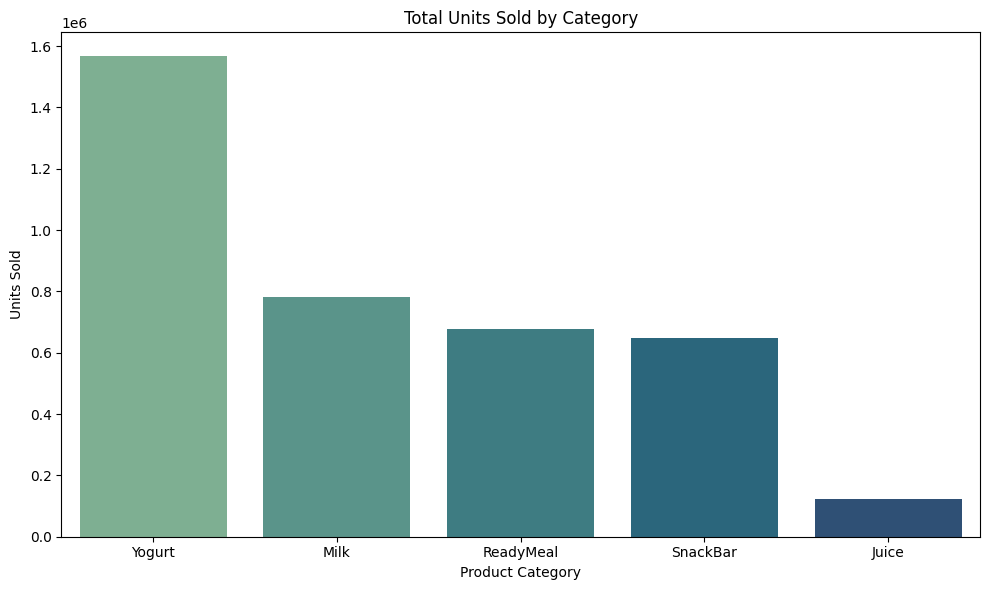

In [20]:
#  Aggregate sales by category 
category_sales = fmcg_df.groupby('category')['units_sold'].sum().reset_index().sort_values(by='units_sold', ascending=False)
print(category_sales)

# Visualize category sales
plt.figure(figsize=(10,6))
sns.barplot(data=category_sales, x='category', y='units_sold', palette='crest', hue='category', dodge=False)
plt.title('Total Units Sold by Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

###### Yogurt is the clear leader with over 1.5 million units sold, indicating it is the primary revenue driver among categories. Milk, ReadyMeal, and SnackBar also show substantial sales, suggesting strong demand and broad consumer interest. Juice performs the lowest, so it may need product development, focused marketing, or reassessment of its shelf space. Investment, promotional strategies, and expansion efforts should prioritize Yogurt and potentially the next best categories for maximum ROI.

           segment  units_sold
10     Yogurt-Seg1      567840
12     Yogurt-Seg3      528536
11     Yogurt-Seg2      470206
2        Milk-Seg2      420953
7    SnackBar-Seg1      307033
4   ReadyMeal-Seg1      291247
3        Milk-Seg3      266247
5   ReadyMeal-Seg2      265911
8    SnackBar-Seg2      224934
0       Juice-Seg3      124349
6   ReadyMeal-Seg3      121684
9    SnackBar-Seg3      115386
1        Milk-Seg1       95534


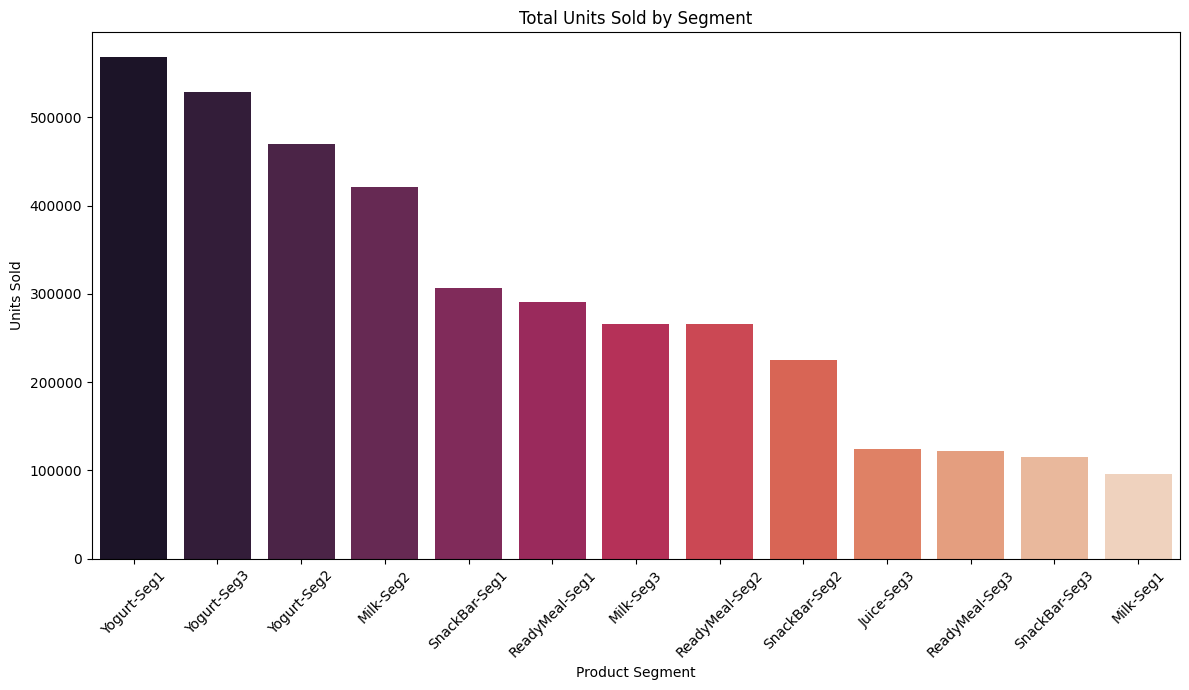

In [21]:
# Aggregate units_sold by segment
segment_sales = fmcg_df.groupby('segment')['units_sold'].sum().reset_index().sort_values(by='units_sold', ascending=False)
print(segment_sales)

# Visualize segment sales
plt.figure(figsize=(12,7))
sns.barplot(data=segment_sales, x='segment', y='units_sold', palette='rocket', hue='segment', dodge=False)
plt.title('Total Units Sold by Segment')
plt.xlabel('Product Segment')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### The Yogurt segments (Seg1, Seg3, Seg2) dominate total sales, each exceeding 450,000 units, signaling exceptional market preference and resilience in this group. These are followed by Milk-Seg2 and strong SnackBar and ReadyMeal segments. Juice-Seg3, with notably fewer units sold, appears to struggle in market competitiveness. Resources should target segment leaders for growth, marketing, and innovation, while underperformers may need repositioning or strategic review.​

     category         segment  units_sold
10     Yogurt     Yogurt-Seg1      567840
12     Yogurt     Yogurt-Seg3      528536
11     Yogurt     Yogurt-Seg2      470206
2        Milk       Milk-Seg2      420953
7    SnackBar   SnackBar-Seg1      307033
4   ReadyMeal  ReadyMeal-Seg1      291247
3        Milk       Milk-Seg3      266247
5   ReadyMeal  ReadyMeal-Seg2      265911
8    SnackBar   SnackBar-Seg2      224934
0       Juice      Juice-Seg3      124349
6   ReadyMeal  ReadyMeal-Seg3      121684
9    SnackBar   SnackBar-Seg3      115386
1        Milk       Milk-Seg1       95534


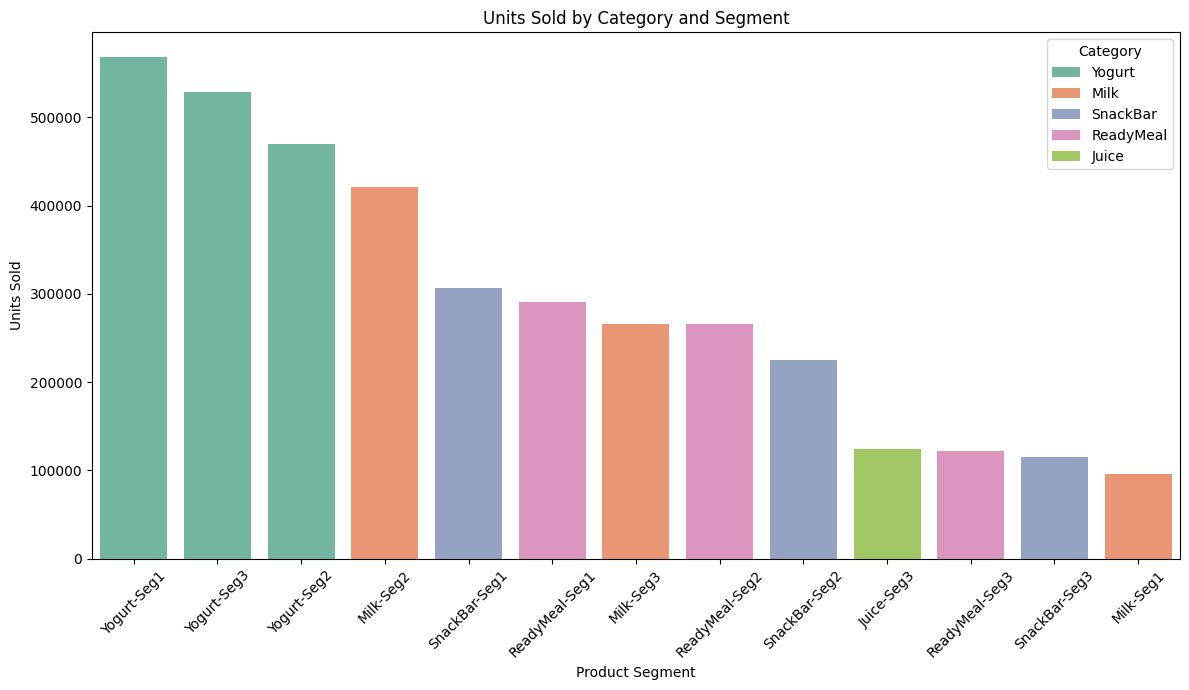

In [22]:
# drill down into category and segment sales
category_segment_sales = fmcg_df.groupby(['category', 'segment'])['units_sold'].sum().reset_index().sort_values(by='units_sold', ascending=False)
print(category_segment_sales)

# Visualize category and segment sales
plt.figure(figsize=(12,7))
sns.barplot(data=category_segment_sales, x='segment', y='units_sold', hue='category', dodge=False, palette='Set2')
plt.title('Units Sold by Category and Segment')
plt.xlabel('Product Segment')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


###### The visualization highlights Yogurt segments as market leaders, with all three Yogurt segments topping sales charts and outperforming every other category-segment combination. Milk-Seg2 and key SnackBar and ReadyMeal segments also have robust performance. Juice-Seg3 remains significantly lower. Resources and innovation should focus on segment leaders, while laggard combinations present clear opportunities for either repositioning or product improvement. This detailed view helps target growth strategies more precisely within and across product groups.​

#### 4. Channel Sales Analysis

      channel  units_sold
1  E-commerce     1268738
2      Retail     1267321
0    Discount     1263801


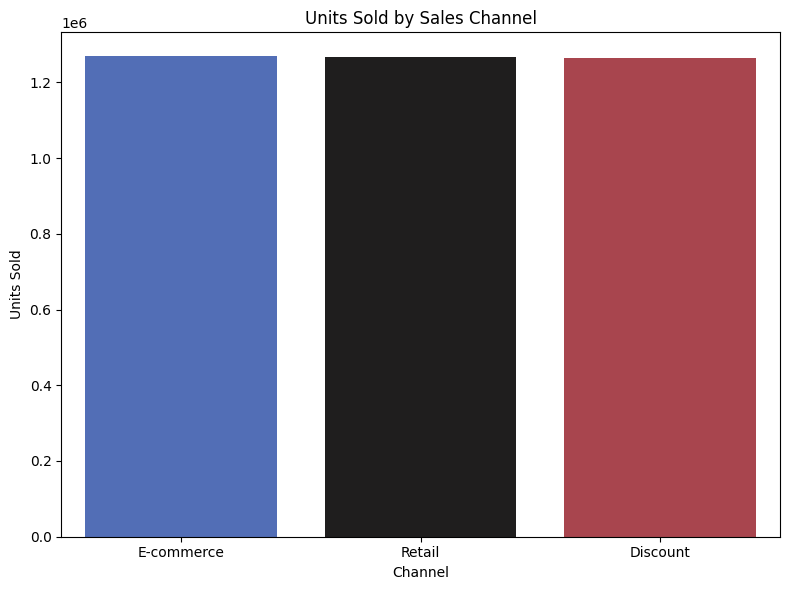

In [23]:
# Compare sales performance across different channels
sales_performance_by_channels = fmcg_df.groupby('channel')['units_sold'].sum().reset_index().sort_values(by='units_sold', ascending=False)
print(sales_performance_by_channels)

# Visualize sales performance by channel
plt.figure(figsize=(8,6))
sns.barplot(data=sales_performance_by_channels, x='channel', y='units_sold', palette='icefire', hue='channel', dodge=False)
plt.title('Units Sold by Sales Channel')
plt.xlabel('Channel')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

###### All three sales channels (E-commerce, Retail, Discount) have nearly identical units sold, each around 1.26 million units. This indicates a highly diversified channel strategy, with online, physical, and discount platforms each driving substantial volume. The business should continue balancing its distribution for resilience, while reviewing channel-specific costs, customer behaviors, and optimization opportunities to further enhance reach and profitability.

### B. Pricing and Promotions

##### 1. Price Sensitivity

Correlation between unit price and units sold: -0.001085035775120952
Intercept: 19.951166030539355
Slope: -0.005893893016102484


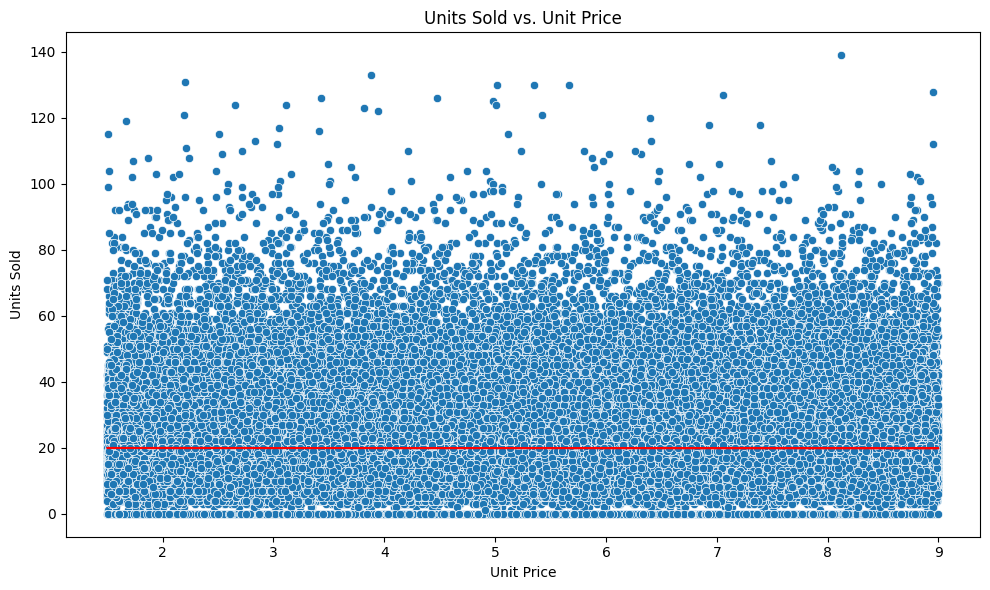

In [24]:
# Calculate correlation
correlation = fmcg_df['price_unit'].corr(fmcg_df['units_sold'])
print(f'Correlation between unit price and units sold: {correlation}')


# Fit a linear regression model
X = fmcg_df[['price_unit']]  
y = fmcg_df['units_sold']

model = LinearRegression()
model.fit(X, y)

print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])

# Add regression line to scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='price_unit', y='units_sold', data=fmcg_df)
plt.plot(fmcg_df['price_unit'], model.predict(X), color='red')
plt.title('Units Sold vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

###### The regression line is almost flat and the Pearson correlation coefficient between price and units sold is very close to zero (-0.0011), indicating virtually no linear relationship between price and units sold. This suggests inelasticity or low price elasticity, that is, changes in price do not significantly impact units sold across the observed time period; customers buy similar quantities regardless of modest price changes.Managers should investigate further at the segment or promotion level, as price sensitivity may vary by product group or with discounting.

##### 2. Promotion Effectiveness

   promotion_flag  units_sold
0               0       17.44
1               1       34.06


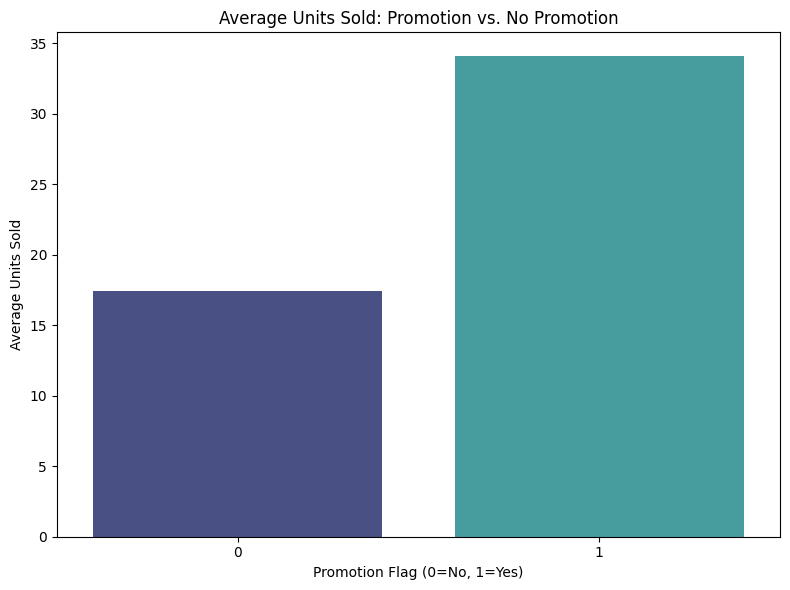

In [25]:
#  Examine sales lift and units_sold by promotion_flag status
promo_stats = fmcg_df.groupby('promotion_flag')['units_sold'].agg('mean').reset_index().round(2)
print(promo_stats)

# Visualize promotion impact on units sold
plt.figure(figsize=(8,6))
sns.barplot(data=promo_stats, x='promotion_flag', y='units_sold', palette='mako', hue='promotion_flag', dodge=False, legend=False)
plt.title('Average Units Sold: Promotion vs. No Promotion')
plt.xlabel('Promotion Flag (0=No, 1=Yes)')
plt.ylabel('Average Units Sold')    
plt.tight_layout()
plt.show()

###### The data shows that when promotions are active (promotion_flag = 1), the average units sold per transaction more than doubles from 17.44 to 34.06 compared to non-promotion periods (promotion_flag = 0). This demonstrates a strong positive impact of promotions on sales lift, significantly increasing the volume of units sold during promotional events. For the business, this indicates that promotional activities are highly effective at driving additional sales and should be strategically timed and targeted for maximum benefit. Continuous monitoring will ensure promotions remain impactful and do not erode baseline sales outside promotional periods.

##### 3. Pack Type Impact

   pack_type  total_units_sold  avg_units_sold  avg_price_unit
0     Carton           1266774       19.896245        5.240493
1  Multipack           1262907       19.872651        5.257041
2     Single           1270179       19.991800        5.258455


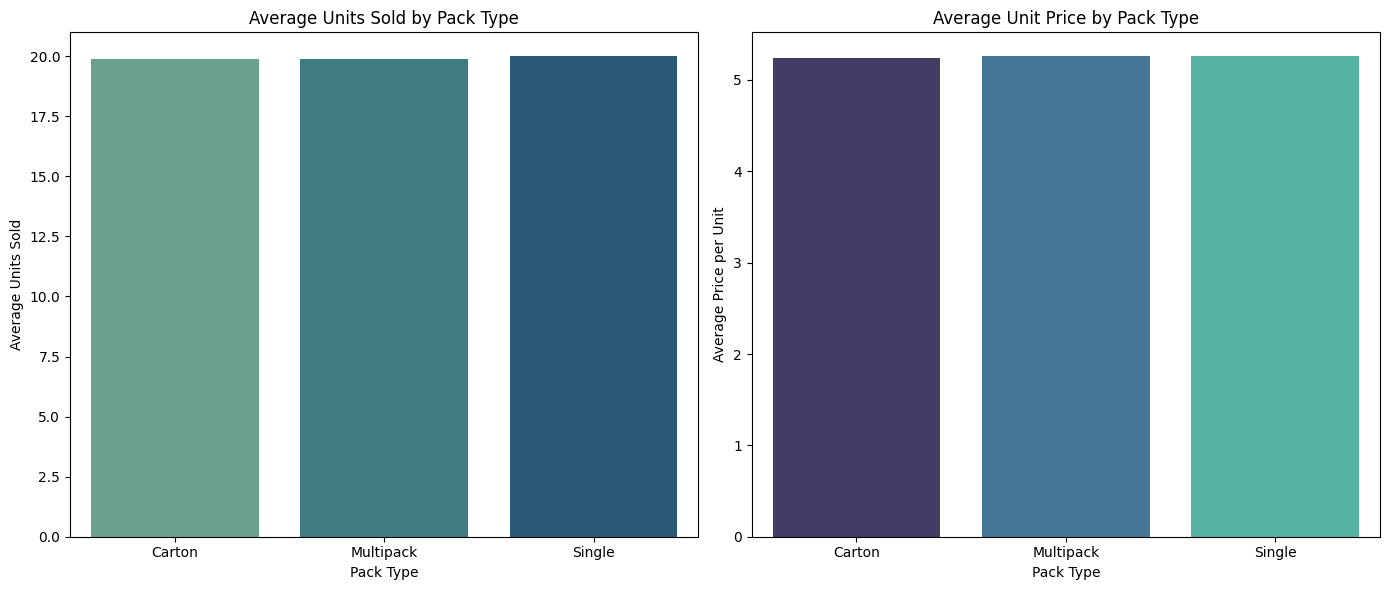

In [26]:
# Assess the influence of different pack_types on sales volume or price points.
packtype_stats = fmcg_df.groupby('pack_type').agg(
    total_units_sold=('units_sold', 'sum'),
    avg_units_sold=('units_sold', 'mean'),
    avg_price_unit=('price_unit', 'mean')
).reset_index()

print(packtype_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot average units sold
sns.barplot(data=packtype_stats, x='pack_type', y='avg_units_sold', palette='crest', hue='pack_type', ax=axes[0])
axes[0].set_title('Average Units Sold by Pack Type')
axes[0].set_xlabel('Pack Type')
axes[0].set_ylabel('Average Units Sold')

# Plot average price per unit
sns.barplot(data=packtype_stats, x='pack_type', y='avg_price_unit', palette='mako', hue='pack_type', ax=axes[1])
axes[1].set_title('Average Unit Price by Pack Type')
axes[1].set_xlabel('Pack Type')
axes[1].set_ylabel('Average Price per Unit')

plt.tight_layout()
plt.show()


###### The data shows that Carton, Multipack, and Single pack_types all generate almost identical total units sold (around 1.27 million each), average units sold per transaction (about 19.9 units), and average unit prices (near 5.25). This indicates that pack type does not have a significant influence on overall sales volume or price points in the business.​ This means consumers do not strongly favor one pack format over another, and all pack types are similarly effective in driving volume and revenue. Pricing strategies and promotional efforts can be designed consistently across pack types, as there is no major difference in consumer response or price sensitivity attributable to packaging format. Strategic focus may instead be directed toward other differentiators such as product innovation, branding, or category expansion.

### C. Supply Chain and Inventory

In [27]:
fmcg_df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,revenue,stock_left,stockout_flag
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,132,0
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.00,0,1
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,110,0
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,74,0
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,136,0


##### 1. Delivery Efficiency

In [40]:
# Analyze delivery_days to evaluate logistics performance 

# Summary statistics of delivery_days
print(fmcg_df['delivery_days'].describe())

print('------------------------------')

# Correlation between delivery_days and units_sold
print(f"Correlation: {fmcg_df['delivery_days'].corr(fmcg_df['units_sold'])}")

count    190754.000000
mean          3.004839
std           1.414626
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: delivery_days, dtype: float64
------------------------------
Correlation: 0.0035056532860311992


###### The summary statistics for delivery days reveal that the majority of orders are delivered within three days, demonstrating efficient logistics with minimal delays. This consistency in delivery times supports strong sales performance and reliable stock availability, helping prevent shortages and maintain customer satisfaction. Maintaining or improving this level of delivery efficiency is essential for sustaining business growth and operational excellence.

###### The correlation between delivery_days and units_sold is extremely close to zero, indicating no meaningful relationship between delivery speed and sales volume in this dataset. This means changes in logistics performance do not have a detectable effect on the amount of product sold, suggesting that current logistics timelines are sufficient and further improvements in delivery speed are unlikely to yield significant sales growth.

##### 2. Stock Management

In [67]:
# Correlate stock_available with units_sold and delivered_qty

# Overall correlations
print("Stock/Units Sold Correlation:", fmcg_df['stock_available'].corr(fmcg_df['units_sold']))
print("Stock/Delivered Qty Correlation:", fmcg_df['stock_available'].corr(fmcg_df['delivered_qty']))

print('------------------------------')

# Correlation by Region
if 'region' in fmcg_df.columns:
    region_corr = fmcg_df.groupby('region').apply(
        lambda x: x['stock_available'].corr(x['units_sold'])
    ).reset_index(name='stock_units_sold_corr')
    print(region_corr.sort_values('stock_units_sold_corr'))

Stock/Units Sold Correlation: 0.5802816519650217
Stock/Delivered Qty Correlation: 0.6688941777007369
------------------------------
       region  stock_units_sold_corr
1    PL-North               0.575689
2    PL-South               0.582390
0  PL-Central               0.582768


C:\Users\bettk\AppData\Local\Temp\ipykernel_9120\694039818.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  region_corr = fmcg_df.groupby('region').apply(


###### The results show a moderately strong positive correlation between stock availability and both units sold and delivered quantity, indicating that higher stock levels are generally matched by greater sales and replenishment activity. Across different regions, this relationship remains consistent, suggesting that effective stock management is supporting sales performance and minimizing the risk of stockouts. This highlights the importance of maintaining appropriate inventory levels across all regions to capitalize on demand and ensure reliable product availability for customers.